## Exploring the dataset:
#### a. A summary of the dataset should include information such as: 
#### 1. Attribute types 
#### 2. Null values 
#### 3. Data filterning 
#### 4. Data cleaning 
#### 5. Data extraction 
#### 6. Data visulization
#### 7. Data manipulation


#### b. plots (graphs, histograms, pie charts) summarizing insights about the dataset.

####  The dataset contains 18 columns/attributes:
- id =  Unique Match ID given to every match played between 2 teams. It increases by 1 for every consecutive match played in a season and abruptly but largely increases every season
- inning = Displays which innings of the match was being played
- over = Shows which over was being played
- ball = Shows which ball was being recorded
- batsman = Shows which batsman was playing in the "Striker" position
- non_striker = Shows which batsman was playing in the "Non striker" position
- bowler = Shows which bowler was bowling the specified over
- batsman_runs = Shows how much run batsman was scoring in each ball
- extra_runs = Shows the amount runs given as extra runs such as wide, no ball etc.
- total_runs = Shows the addition of "batsman_runs" and "extra_runs"
- is_wicket = Shows the data=1 when the wicket fell and vice versa
- dismissal_kind = Shows the type of the dismissal when the wicket fell
- player_dismissed = Shows which batsman was taken out by the wicket.
- fielder = Shows which fielder took the wicket if the player was involved
- extras_type = Shows the type of extra when the extra run occurs
- batting_team = Displays which team was currently batting in the match
- bowling_team = Displays which team was currently bowling in the match

#### Attribute Types:
**Nominal** - id, batsman, non_striker, bowler, dismissal_kind, player_dismissed, fielder, extras_type, batting_team, bowling_team

**Ordinal** - over, ball, batsman_runs, total_runs, extra_runs

**Binary** - inning, is_wicket, non_boundary

#### NA and Null Type values:
dismissal_kind, player_dismissed, fielder, extras_type are NA type values which Either contian NA or some defininte value.






# 1. Exploratory Data Analysis (EDA)

In [1]:
pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#IMPORTING LIBARARIES

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq
trends = TrendReq()

In [3]:
#LOADING DATASET
from google.colab import drive
drive.mount('/content/drive')
#data = pd.read_csv("/content/IPL Ball-by-Ball 2008-2020.csv")
data = pd.read_csv("/content/drive/MyDrive/ipl_all_matches.csv")
data.head()

Mounted at /content/drive


<ipython-input-3-178a220b4a8e>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/ipl_all_matches.csv")


,match_id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,batsman,...,wides,noballs,byes,legbyes,penalty,dismissal_kind,is_wicket,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,...,NaN,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN
1,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,335982,2007/08,18-04-2008,M Chinnaswamy Stadium,1,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
data['total_runs'] = data['batsman_runs'] + data['extra_runs'] 

In [ ]:
data.rename(columns = {'match_id':'id'}, inplace = True)

In [ ]:
#CREATING FUNCTION TO PRINT IDA 

def initial_EDA():
    print("Summary \n\n", data.info())                              
    print("\n--------------------------------------------\n")
    print("Shape\n\n", data.shape)                                              #PRINTING SHAPE OF THE DATA
    print("\n--------------------------------------------\n")
    print("Data Types\n\n", data.dtypes)                                        #PRINTING TYPE OF DATA
    print("\n--------------------------------------------\n")
    print("Any Duplicate Values?\n\n", data.duplicated().sum())                 #CHECKING FOR DUPLICATE VALUES
    print("\n--------------------------------------------\n")
    print("Empty Values Total \n\n", data.isnull().sum())                       #COUNTING FOR NULL ROWS
    print("\n--------------------------------------------\n")
    print("Non-empty values Total \n\n", data.notnull().sum())                  #COUNTING NON NULL ROWS
    print("\n--------------------------------------------\n")
    print("Columns names\n\n", data.columns)                                    #PRINTING COLUMN NAMES
    print("\n--------------------------------------------\n")
    print("Unique Values\n\n", data.nunique())                                  #COUNTING UNIQUE VALUES IN EVERY COLUMNS
    print("\n--------------------------------------------\n")
initial_EDA()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234759 entries, 0 to 234758
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      234759 non-null  int64  
 1   season                  234759 non-null  object 
 2   start_date              234759 non-null  object 
 3   venue                   234759 non-null  object 
 4   innings                 234759 non-null  int64  
 5   over                    234759 non-null  int64  
 6   ball                    234759 non-null  int64  
 7   batting_team            234759 non-null  object 
 8   bowling_team            234759 non-null  object 
 9   batsman                 234759 non-null  object 
 10  non_striker             234759 non-null  object 
 11  bowler                  234759 non-null  object 
 12  batsman_runs            234759 non-null  int64  
 13  extra_runs              234759 non-null  int64  
 14  wides               

PLOTTING HEATMAP FOR NULL VALUES.

[Text(0.5, 23.38159722222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Null Values'),
 Text(0.5, 1.0, 'Heatmap of null values in the data')]

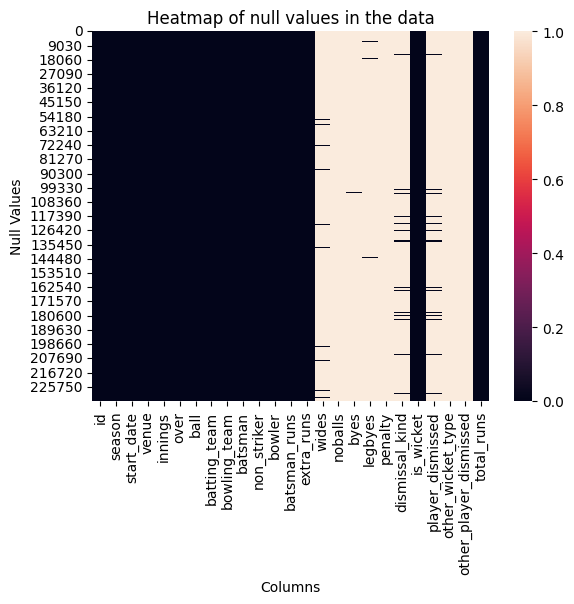

In [ ]:
#HEATMAP FOR NULL VALUES

s = sns.heatmap(data.isnull())
s.set(xlabel='Columns', ylabel='Null Values', title = 'Heatmap of null values in the data')

In [ ]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])                          #COUNTING COLUMNS IN DATA
    print('2) Number of rows are : ',data.shape[0])                             #COUNTING NUMBER OF ROWS
    print('3) Total number of data-points :',data.size)                         #COUNTING EVERY POINT (ROWS x COLUMNS)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']       #COUNTING NUMERICAL FEATURES (i,e NON OBJECT)
    print('4) Count of Numerical Features :',len(numerical_features))           #PRINTING COUNT OF NUMERICAL FEATURES
data_info(data)

1) Number of columns are :  25
2) Number of rows are :  234759
3) Total number of data-points : 5868975
4) Count of Numerical Features : 15


In [ ]:
def features_with_missing_values(data):
    '''
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    first sum() is for summing per individual column
    second sum() for summing over every column and give final total
    '''
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100             #CALCULLATING % OF TOTAL MISSING VALUE IN DATA
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')         #PRINTING COUNT OF MISSING FOR EVERY COLUMN   
features_with_missing_values(data)

Percentage of Total Missing Values is  35.39 %
Missing Value Estimation :
The Feature  wides  has 227437 missing values
The Feature  noballs  has 233798 missing values
The Feature  byes  has 234153 missing values
The Feature  legbyes  has 231110 missing values
The Feature  penalty  has 234757 missing values
The Feature  dismissal_kind  has 223136 missing values
The Feature  player_dismissed  has 223136 missing values
The Feature  other_wicket_type  has 234759 missing values
The Feature  other_player_dismissed  has 234759 missing values


In [ ]:
'''
FINDING THE RUNS SCORED IN EACH OVER.
EX. FROM OUR DATA WE CAN SAY THAT IN 1ST OVER OF EACH MATCH COMBINED 9804 RUNS 
HAS BEEN SCORED
'''
# This code groups rows by 'over' and applies function 'sum' over
# total_runs. Hence, we get a new dataframe with total runs per over.
data_runrate = data.groupby('over')\
            .agg({'id':'nunique','total_runs':'sum'})\
            .reset_index()
data_runrate

,over,id,total_runs
0,0,986,12107
1,1,986,14211
2,2,986,15690
3,3,986,16314
4,4,986,16438
5,5,985,16408
6,6,985,13173
7,7,985,14225
8,8,984,14713
9,9,984,14571


[Text(0.5, 1.0, 'RUNS vs OVER')]

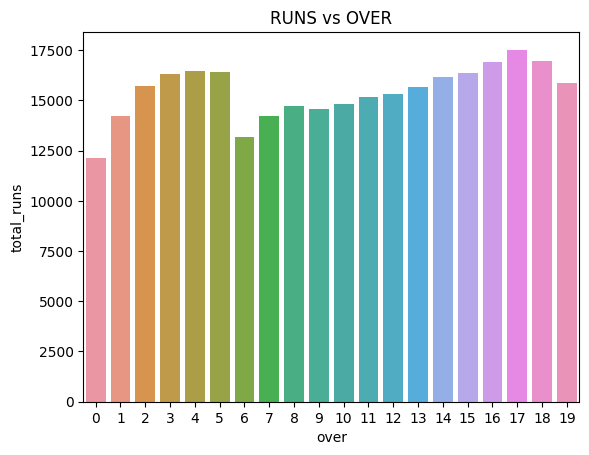

In [ ]:
sns.barplot(x="over", y="total_runs", data=data_runrate).set(title='RUNS vs OVER')

In [ ]:
data_runrate['over'].corr(data_runrate['total_runs'])

0.5781460149963115

In [ ]:
'''
FINDING RUNS SCORED ON EACH BALL
EX. FROM OUR DATA WE CAN SAY THAT ON 1ST BALL OF EVERY OVER , EVERY MATCH 
COMBINED 39664 RUNS HAS BEEN SCORED.
'''

#Distribution of runs per ball of over
data_inoverdist = data.groupby('ball')\
            .agg({'id':'nunique','total_runs':'sum'})\
            .reset_index()
data_inoverdist

,ball,id,total_runs
0,1,986,48594
1,2,986,49644
2,3,986,50423
3,4,986,50638
4,5,986,49673
5,6,986,48527
6,7,984,9346
7,8,648,1509
8,9,165,201
9,11,2,0


<Axes: xlabel='ball', ylabel='total_runs'>

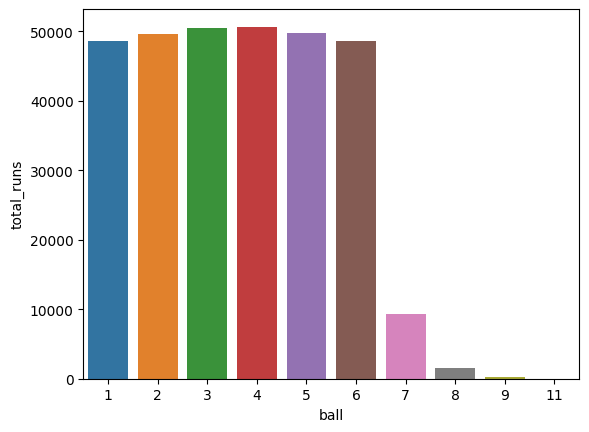

In [ ]:
'''
Bar chart for total runs on each ball
'''
sns.barplot(x="ball", y="total_runs", data=data_inoverdist)

In [ ]:
data_inoverdist['ball'].corr(data_inoverdist['total_runs'])

-0.8659752261614139

In [ ]:
'''
FINDING THE WICKET TAKEN IN EACH OVER.
EX. FROM OUR DATA WE CAN SAY THAT IN 1ST OVER OF EACH MATCH COMBINED 318 WICKETS 
HAS BEEN TAKEN
'''

# This code groups columns by 'over' and sums the 'is_wicket' column
# The resulting dataframe gives the number of wickets per over
data_wicket_over = data.groupby('over')\
            .agg({'id':'nunique','is_wicket':'sum'})\
            .reset_index()
data_wicket_over

,over,id,is_wicket
0,0,986,413
1,1,986,449
2,2,986,482
3,3,986,489
4,4,986,504
5,5,985,490
6,6,985,394
7,7,985,421
8,8,984,485
9,9,984,444


<Axes: xlabel='over', ylabel='is_wicket'>

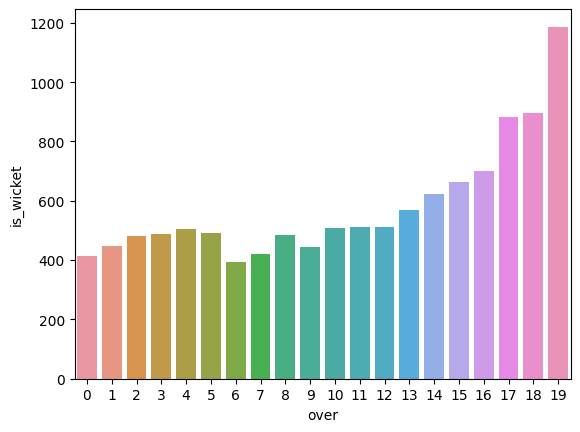

In [ ]:
sns.barplot(x="over", y="is_wicket", data=data_wicket_over)

<Axes: xlabel='over', ylabel='is_wicket'>

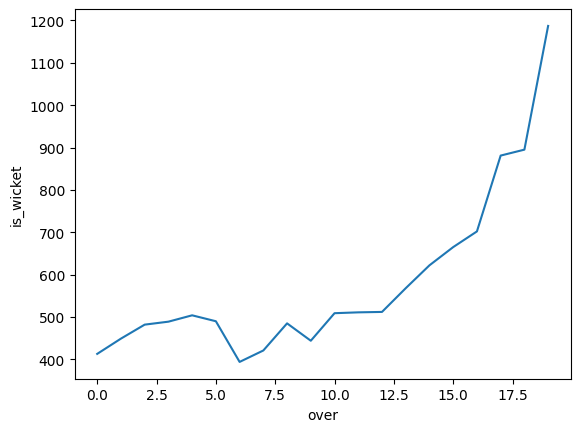

In [ ]:
sns.lineplot(x=data_wicket_over["over"], y=data_wicket_over["is_wicket"])

In [ ]:
data_wicket_over['over'].corr(data_wicket_over['is_wicket'])

0.7961308252041996

### Season wise Analysis of 4s and 6s

In [ ]:
'''
COUNTING TOTAL NUMBER OF SIXES PER SEASON
HERE WE ARE EXTRACTING ONLY SIXES SCORED BY BATSMAN
'''

# Here we are counting the number of sixes grouped by match id
data_6s_permatch = data[(data['batsman_runs']==6)]\
            .groupby('id').count()\
            .reset_index()\
            .sort_values('id')

# seperating by innings
data_6s_permatch = data_6s_permatch.loc[:,["id", "innings"]]
data_6s_permatch.columns = ["match_id", "6s"]
data_6s_permatch

,match_id,6s
0,335982,17
1,335983,25
2,335984,4
3,335985,11
4,335986,10
...,...,...
981,1359506,12
982,1359507,30
983,1359508,3
984,1359509,21


In [ ]:
data['start_date'] = pd.to_datetime(data['start_date'], format = '%d-%m-%Y')

In [ ]:
data['year'] = data['start_date'].dt.year

In [ ]:
data

,id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,batsman,...,byes,legbyes,penalty,dismissal_kind,is_wicket,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,...,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,1,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234754,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,3,Royal Challengers Bangalore,Kolkata Knight Riders,Vijaykumar Vyshak,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,2023
234755,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,4,Royal Challengers Bangalore,Kolkata Knight Riders,DJ Willey,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,4,2023
234756,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,5,Royal Challengers Bangalore,Kolkata Knight Riders,DJ Willey,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,2023
234757,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,6,Royal Challengers Bangalore,Kolkata Knight Riders,DJ Willey,...,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,1,2023


In [ ]:
'''
ARRANGING THE EXTRACTED DATA SEASON WISE
'''
k=0
season_6 = [0]*15

data_6s_per_season = data[(data['batsman_runs']==6)]\
            .groupby('year').count()\
            .reset_index()

season_6 = data_6s_per_season['id'].to_list()

In [ ]:
year = [i for i in range(2008,2024)]

[Text(0.5, 1.0, 'NO. OF SIXES PER SEASON')]

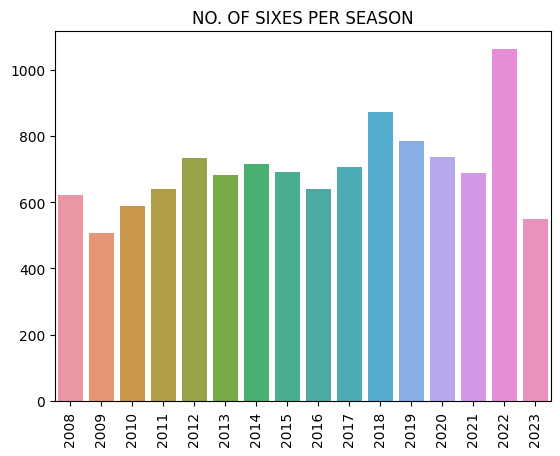

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=year,y=season_6).set(title='NO. OF SIXES PER SEASON')

In [ ]:
'''
EXTRACTING DATA FOR 4 RUNS SCORED BY BATSMAN
'''
data_4s_permatch = data[(data['batsman_runs']==4)]\
            .groupby('id').count()\
            .reset_index()\
            .sort_values('id')

data_4s_permatch = data_4s_permatch.loc[:,["id", "innings"]]
data_4s_permatch.columns = ["match_id", "4s"]
data_4s_permatch

,match_id,4s
0,335982,18
1,335983,38
2,335984,32
3,335985,33
4,335986,11
...,...,...
981,1359506,36
982,1359507,28
983,1359508,28
984,1359509,22


In [ ]:
'''
ARRANGING 4'S SEASON WISE
'''
season_4 = [0]*13
data_4s_per_season = data[(data['batsman_runs']==4)]\
            .groupby('year').count()\
            .reset_index()

season_4 = data_4s_per_season['id'].to_list()

In [ ]:
season_4

[1703,
 1321,
 1709,
 1916,
 1911,
 2054,
 1563,
 1611,
 1633,
 1612,
 1652,
 1655,
 1589,
 1551,
 2020,
 1035]

[Text(0.5, 1.0, 'NO. OF FOURS PER SEASON')]

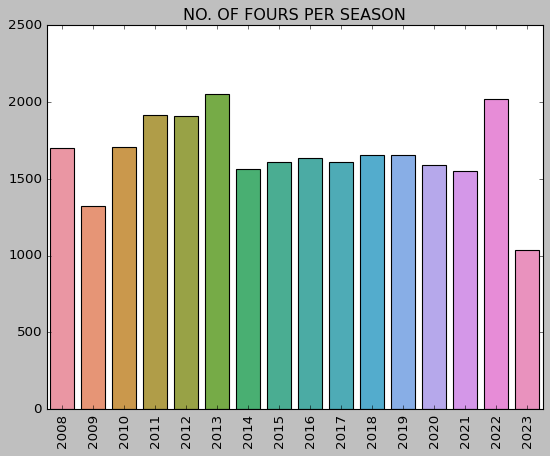

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x=year,y=season_4).set(title='NO. OF FOURS PER SEASON')

In [ ]:
figure = px.pie(data, values='batsman_runs', names='over', title='Pie chart of runs in each over' , hole=0.5)
figure.show()

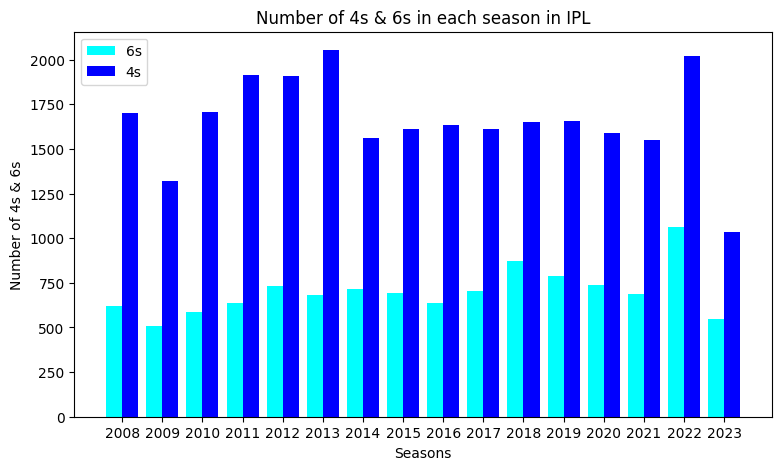

In [ ]:
'''
PLOTTING GRAPH OF 4'S AND 6'S
'''

X = ['2008','2009','2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
X_axis = np.arange(len(X))

plt.figure(figsize = (9, 5))

plt.bar(X_axis - 0.2, season_6, 0.4, label = '6s', color='cyan')
plt.bar(X_axis + 0.2, season_4, 0.4, label = '4s', color='blue')

plt.xticks(X_axis, X)
plt.xlabel("Seasons")
plt.ylabel("Number of 4s & 6s")
plt.title("Number of 4s & 6s in each season in IPL")
plt.legend()

plt.show()

In [ ]:
'''
Pie chart to represent how various dismissals happen for a batsman 
'''
figure = px.pie(data, names = 'dismissal_kind', title='Pie chart of out in each match' , hole=0.5)
figure.show()

In [ ]:
data1 = data.copy()

data1.dropna(subset=['dismissal_kind'],inplace=True)

figure = px.pie(data1, names = 'dismissal_kind', title='Pie chart of out in each match' , hole=0.5)
figure.show()

### Batsman Stats

In [ ]:
'''
BATSMAN STATS: NAME->INNINGS PLAYED->DISMISSALS->RUN SCORED
'''
# Creating a dataframe with batsman stats, like number of innings, dismissals
# and scored runs
data_batsman = data.groupby('batsman')\
            .agg({'id':'nunique','is_wicket':'sum','batsman_runs':'sum'})\
            .reset_index()
data_batsman.columns = ['player', 'batting_innings','dismissals','scored_runs']
data_batsman.head()

,player,batting_innings,dismissals,scored_runs
0,A Ashish Reddy,23,15,280
1,A Badoni,17,13,246
2,A Chandila,2,1,4
3,A Chopra,6,5,53
4,A Choudhary,3,2,25


,player,sixes
79,CH Gayle,359
13,AB de Villiers,253
305,RG Sharma,251
241,MS Dhoni,235
399,V Kohli,230


[Text(0.5, 1.0, 'HIGHEST NUMBER OF SIXES')]

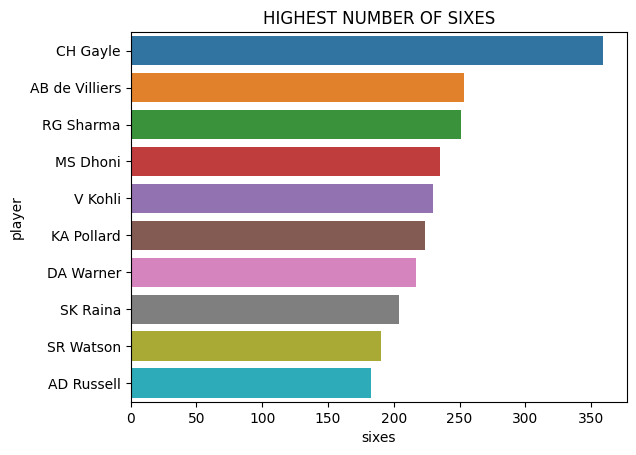

In [ ]:
'''
TOTAL SIXES BY BATSMAN
'''
data_batsman_sixes = data[(data['batsman_runs']==6)]\
            .groupby('batsman')['id']\
            .count()\
            .reset_index()\
            .sort_values('id',ascending = False)
data_batsman_sixes.columns = ['player','sixes']
display(data_batsman_sixes.head(5))

sns.barplot(x="sixes", y="player", data=data_batsman_sixes.head(10)).set(title='HIGHEST NUMBER OF SIXES')

,player,fours
398,S Dhawan,730


[Text(0.5, 1.0, 'HIGHEST NUMBER OF FOURS')]

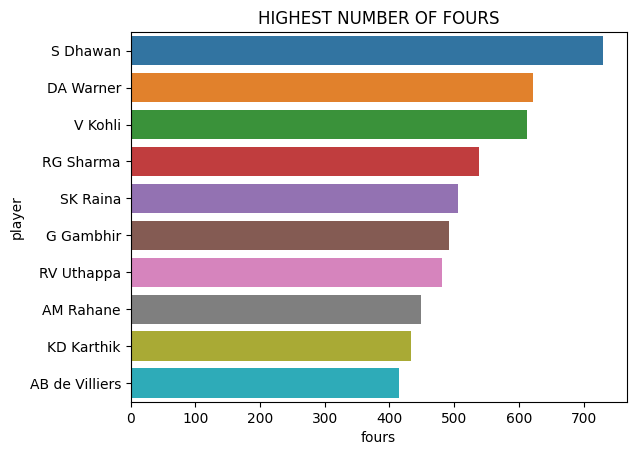

In [ ]:
'''
TOTAL 4'S BY BATSMAN
'''
data_batsman_fours = data[(data['batsman_runs']==4)]\
            .groupby('batsman')['id']\
            .count()\
            .reset_index()\
            .sort_values('id',ascending = False)
data_batsman_fours.columns = ['player','fours']
display(data_batsman_fours.head(1))

sns.barplot(x="fours", y="player", data=data_batsman_fours.head(10)).set(title='HIGHEST NUMBER OF FOURS')

In [ ]:
'''
TOTAL BALLS FACED BY BATSMAN
'''
data_batsman_balls = data[(data['extra_runs']==0)].groupby('batsman')['id']\
                     .count().sort_values(ascending = False).reset_index()
data_batsman_balls.columns = ['player','faced_balls']
data_batsman_balls.head()

,player,faced_balls
0,V Kohli,5301
1,S Dhawan,4998
2,RG Sharma,4596
3,DA Warner,4339
4,SK Raina,3967


[Text(0.5, 1.0, 'HIGHEST NUMBER OF BALL FACED')]

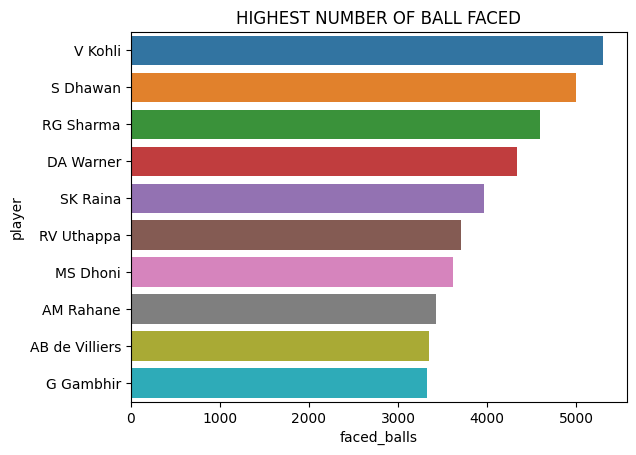

In [ ]:
sns.barplot(x="faced_balls", y="player", data=data_batsman_balls.head(10)).set(title='HIGHEST NUMBER OF BALL FACED')

In [ ]:
'''
HIGHEST RUNS SCORED BY BATSMAN
'''
data_permatch = data.groupby(['batsman','id'])['batsman_runs'].sum().reset_index()
data_highscore = data_permatch.groupby(['batsman'])['batsman_runs']\
                 .max().sort_values(ascending = False).reset_index()
data_highscore.columns = ['player','high_score']
data_highscore.head()

,player,high_score
0,CH Gayle,175
1,BB McCullum,158
2,Q de Kock,140
3,AB de Villiers,133
4,KL Rahul,132


[Text(0.5, 1.0, 'HIGHEST INDIVIDUAL RUN SCORE')]

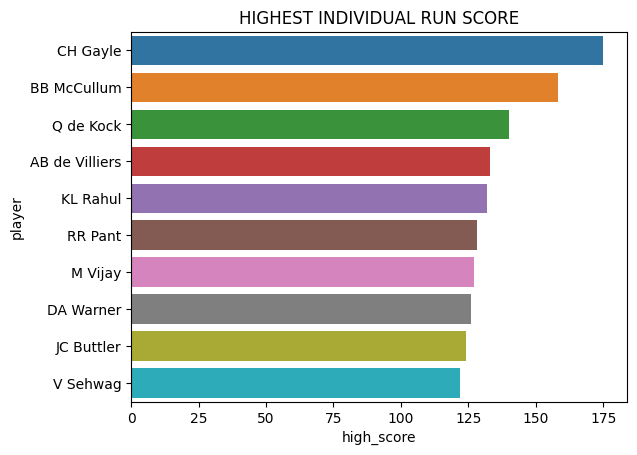

In [ ]:
sns.barplot(x="high_score", y="player", data=data_highscore.head(10)).set(title='HIGHEST INDIVIDUAL RUN SCORE')

In [ ]:
'''
TOTAL 50+ RUNS SCORED BY BATSMAN
'''
data_fifties = data_permatch[(data_permatch['batsman_runs']>=50)&(data_permatch['batsman_runs']<100)]\
        .groupby('batsman')['batsman_runs']\
        .count()\
        .reset_index()\
        .sort_values('batsman_runs',ascending=False)
data_fifties.columns = ['player','fifties']
data_fifties.head()

,player,fifties
33,DA Warner,59
170,V Kohli,50
136,S Dhawan,49
125,RG Sharma,41
3,AB de Villiers,41


[Text(0.5, 1.0, 'MOST FIFTIES BY PLAYER')]

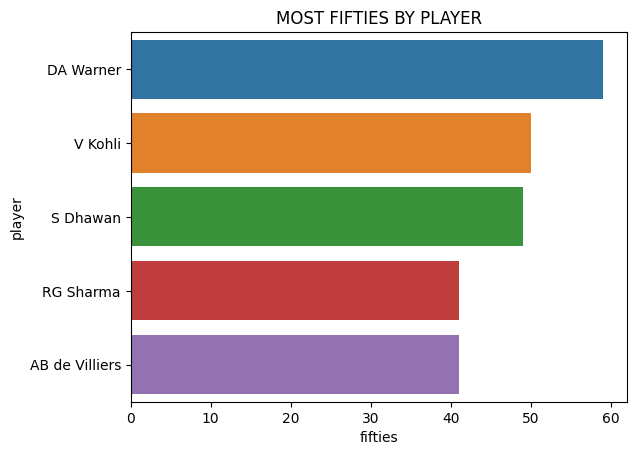

In [ ]:
sns.barplot(x="fifties", y="player", data=data_fifties.head()).set(title='MOST FIFTIES BY PLAYER')

In [ ]:
'''
TOTAL CENTURIES BY BATSMAN
'''
data_centuries = data_permatch[data_permatch['batsman_runs']>=100]\
        .groupby('batsman')['batsman_runs']\
        .count()\
        .reset_index()\
        .sort_values('batsman_runs',ascending=False)
data_centuries.columns = ['player','centuries']
data_centuries.head()

,player,centuries
7,CH Gayle,6
14,JC Buttler,5
37,V Kohli,5
10,DA Warner,4
34,SR Watson,4


[Text(0.5, 1.0, 'MOST CENTURIES BY PLAYER')]

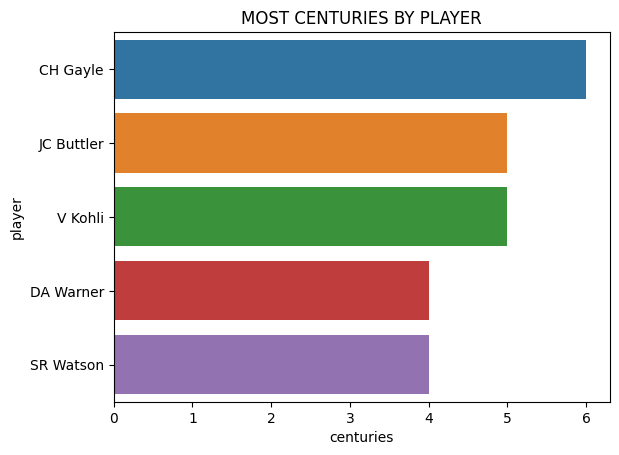

In [ ]:
sns.barplot(x="centuries", y="player", data=data_centuries.head()).set(title='MOST CENTURIES BY PLAYER')

In [ ]:
'''
MERGING PLAYER WISE EXTRACTED DATA OF SIXES,FOURS,BALL FACED,CENTURIES,FIFTIES
FOR FURTHUR ANALYSIS
'''
data_batsman = data_batsman.merge(data_batsman_sixes, on='player',how='outer')\
                    .merge(data_batsman_fours, on='player',how='outer')\
                    .merge(data_batsman_balls, on='player',how='outer').merge(data_highscore, on='player',how='outer')\
                    .merge(data_centuries, on='player',how='outer').merge(data_fifties, on='player',how='outer')
data_batsman.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties
0,A Ashish Reddy,23,15,280,15.0,16.0,191.0,36,NaN,NaN
1,A Badoni,17,13,246,9.0,16.0,191.0,54,NaN,1.0
2,A Chandila,2,1,4,NaN,NaN,7.0,4,NaN,NaN
3,A Chopra,6,5,53,NaN,7.0,70.0,24,NaN,NaN
4,A Choudhary,3,2,25,1.0,1.0,20.0,15,NaN,NaN


In [ ]:
'''
CREATING TWO NEW COLUMNS 'battting_strikerate' and 'batting average' and calculating them
'''
data_batsman['batting_strikerate'] = (data_batsman['scored_runs']/data_batsman['faced_balls'])*100
data_batsman['batting_avg'] = data_batsman['scored_runs']/data_batsman['dismissals']

# Replacing NaN values with 0
data_batsman.fillna(0, inplace=True)  

# sorting dataframe with respect to scored_runs
data_batsman = data_batsman.sort_values(by='scored_runs', ascending=False)
data_batsman.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg
589,V Kohli,223,200,6967,230.0,612.0,5301.0,113,5.0,50.0,131.428032,34.835000
481,S Dhawan,209,182,6477,145.0,730.0,4998.0,106,2.0,49.0,129.591837,35.587912
137,DA Warner,169,150,6189,217.0,621.0,4339.0,126,4.0,59.0,142.636552,41.260000
448,RG Sharma,228,210,6062,251.0,539.0,4596.0,109,1.0,41.0,131.897302,28.866667
512,SK Raina,200,168,5536,204.0,506.0,3967.0,100,1.0,39.0,139.551298,32.952381


[Text(0.5, 1.0, 'HIGHEST RUN SCORERS IN IPL')]

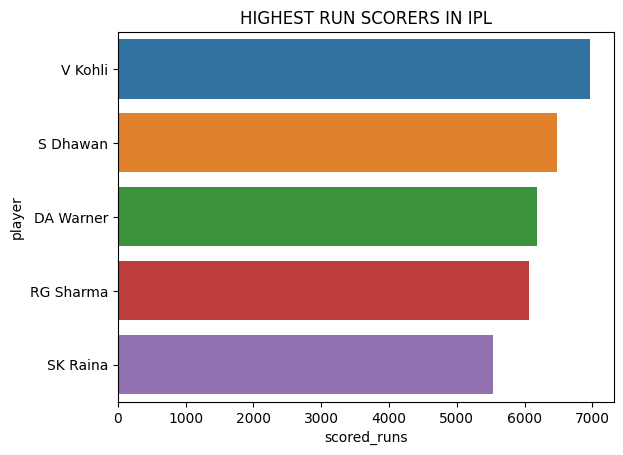

In [ ]:
sns.barplot(x="scored_runs", y="player", data=data_batsman.head()).set(title='HIGHEST RUN SCORERS IN IPL')

[Text(0.5, 1.0, 'HIGHEST STRIKE RATE')]

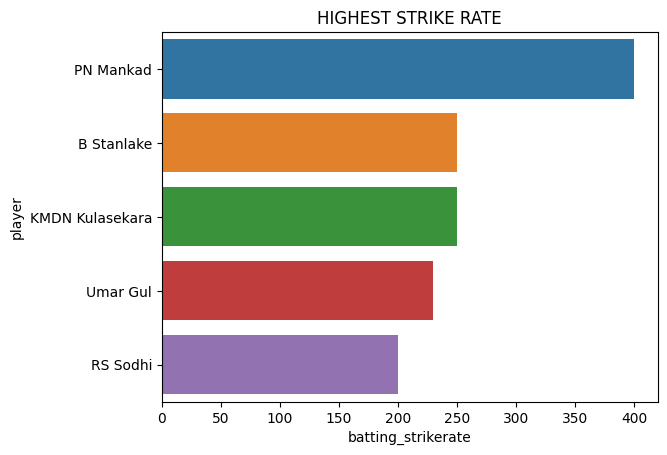

In [ ]:
data_strikerate = data_batsman.sort_values(by='batting_strikerate',ascending=False)
sns.barplot(x='batting_strikerate',y='player',data=data_strikerate.head()).set(title='HIGHEST STRIKE RATE')

[Text(0.5, 1.0, 'HIGHEST BATTING AVERAGE')]

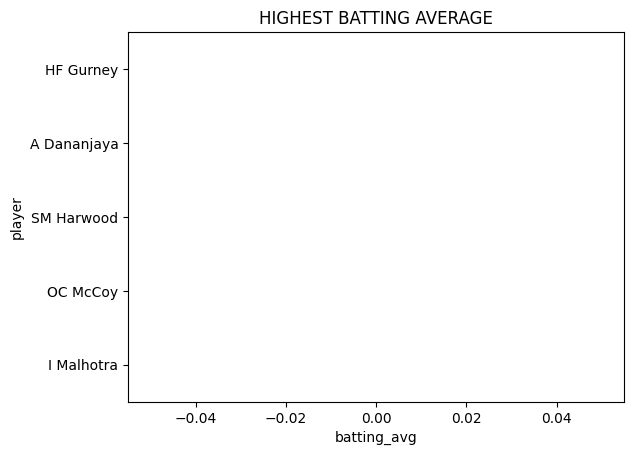

In [ ]:
data_batavg = data_batsman.sort_values(by='batting_avg',ascending=False)
sns.barplot(x='batting_avg',y='player',data=data_batavg.head()).set(title='HIGHEST BATTING AVERAGE')

### Bowler Stats

In [ ]:
data_bowler = data[(data['dismissal_kind']!='run out')&(data['dismissal_kind']!='obstructing the field')&(data['dismissal_kind']!='retired hurt')]
data_bowler = data_bowler.groupby('bowler').agg({'id':'nunique','total_runs':'sum','is_wicket':'sum'}).reset_index()
data_bowler.columns = ['player', 'bowling_innings', 'runs_conceded', 'wickets_taken']
data_bowler = data_bowler.sort_values(by='wickets_taken',ascending=False)
data_bowler.head()

,player,bowling_innings,runs_conceded,wickets_taken
112,DJ Bravo,158,4426,183
488,YS Chahal,137,3926,178
409,SL Malinga,122,3477,170
7,A Mishra,158,4087,170
324,PP Chawla,171,4557,168


<Axes: xlabel='wickets_taken', ylabel='player'>

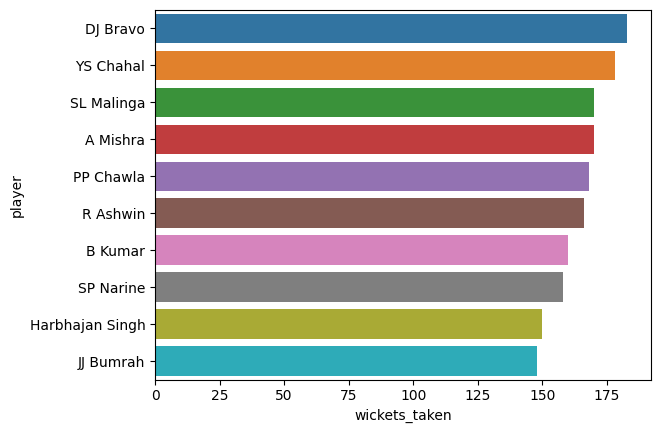

In [ ]:
sns.barplot(x='wickets_taken',y='player',data=data_bowler.head(10))

In [ ]:
data_balls_bowled = data[(data['extra_runs']==0)]\
                  .groupby('bowler')['id']\
                  .count().sort_values(ascending = False).reset_index()
data_balls_bowled.columns = ['player','bowled_balls']
data_balls_bowled.head()

,player,bowled_balls
0,R Ashwin,4016
1,SP Narine,3580
2,PP Chawla,3404
3,Harbhajan Singh,3367
4,B Kumar,3315


<Axes: xlabel='bowled_balls', ylabel='player'>

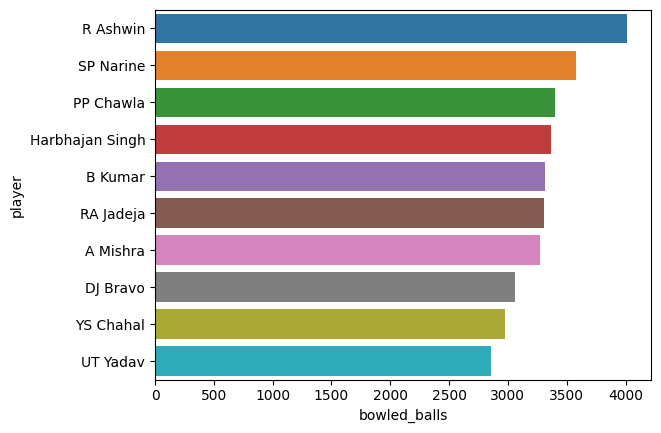

In [ ]:
sns.barplot(x="bowled_balls", y="player", data=data_balls_bowled.head(10))

In [ ]:
data_bowler_permatch = data[(data['dismissal_kind']!='run out')&(data['dismissal_kind']!='obstructing the field')&(data['dismissal_kind']!='retired hurt')]
data_bowler_permatch = data_bowler_permatch.groupby(['bowler','id'])['is_wicket'].sum().reset_index()

data_bowler_bestspell = data_bowler_permatch.groupby(['bowler'])['is_wicket'].max().reset_index()
data_bowler_bestspell.columns = ['player','best_spell']
data_bowler_bestspell

,player,best_spell
0,A Ashish Reddy,3
1,A Badoni,1
2,A Chandila,4
3,A Choudhary,2
4,A Dananjaya,0
...,...,...
489,Yash Dayal,3
490,Yash Thakur,1
491,Yudhvir Singh,2
492,Yuvraj Singh,4


In [ ]:
data_bowler_4wh = data_bowler_permatch[(data_bowler_permatch['is_wicket'] >= 4)]\
        .groupby('bowler')['is_wicket']\
        .count()\
        .reset_index()\
        .sort_values('is_wicket',ascending=False)
data_bowler_4wh.columns = ['player','4W']
data_bowler_4wh

,player,4W
104,SP Narine,8
45,K Rabada,7
101,SL Malinga,7
2,A Mishra,5
116,YS Chahal,5
...,...,...
44,JR Hazlewood,1
42,JP Duminy,1
41,JO Holder,1
38,JA Morkel,1


<Axes: xlabel='4W', ylabel='player'>

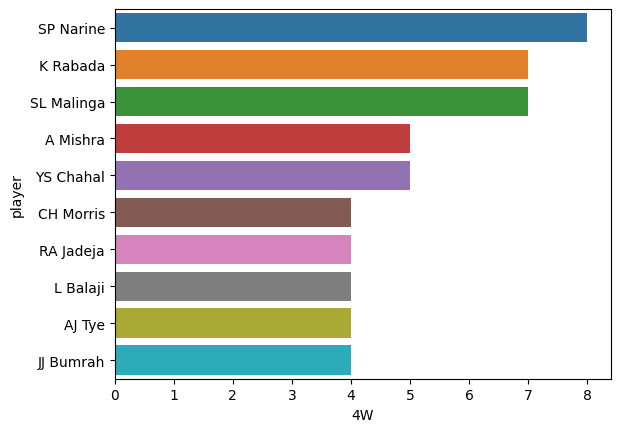

In [ ]:
sns.barplot(x="4W", y="player", data=data_bowler_4wh.head(10))

In [ ]:
data_bowler = data_bowler.merge(data_balls_bowled, on='player',how='outer').merge(data_bowler_bestspell, on='player',how='outer').merge(data_bowler_4wh, on='player',how='outer')
data_bowler

,player,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W
0,DJ Bravo,158,4426,183,3064,4,2.0
1,YS Chahal,137,3926,178,2975,5,5.0
2,SL Malinga,122,3477,170,2754,5,7.0
3,A Mishra,158,4087,170,3270,5,5.0
4,PP Chawla,171,4557,168,3404,4,2.0
...,...,...,...,...,...,...,...
489,RV Patel,1,22,0,18,0,NaN
490,RS Gavaskar,1,8,0,6,0,NaN
491,DJ Harris,2,26,0,18,0,NaN
492,LRPL Taylor,2,24,0,12,0,NaN


In [ ]:
# data_bowler.drop(['Bowling_strikeRate'], axis=1, inplace=True)
data_bowler['bowled_overs'] = data_bowler['bowled_balls']/6
data_bowler['bowling_avg'] = data_bowler['runs_conceded']/data_bowler['wickets_taken']
data_bowler['bowling_strikeRate'] = data_bowler['bowled_balls']/data_bowler['wickets_taken']
data_bowler['Economy Rate'] = data_bowler['runs_conceded']/data_bowler['bowled_overs']
data_bowler.head()

,player,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,bowled_overs,bowling_avg,bowling_strikeRate,Economy Rate
0,DJ Bravo,158,4426,183,3064,4,2.0,510.666667,24.185792,16.743169,8.667102
1,YS Chahal,137,3926,178,2975,5,5.0,495.833333,22.056180,16.713483,7.917983
2,SL Malinga,122,3477,170,2754,5,7.0,459.000000,20.452941,16.200000,7.575163
3,A Mishra,158,4087,170,3270,5,5.0,545.000000,24.041176,19.235294,7.499083
4,PP Chawla,171,4557,168,3404,4,2.0,567.333333,27.125000,20.261905,8.032315


### Player Stats

In [ ]:
data_player = data_batsman.merge(data_bowler, on='player', how='outer')

# Replacing NaN values with 0
data_player.fillna(0, inplace=True)
data_player.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,...,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,bowled_overs,bowling_avg,bowling_strikeRate,Economy Rate
0,V Kohli,223.0,200.0,6967.0,230.0,612.0,5301.0,113.0,5.0,50.0,...,26.0,370.0,4.0,248.0,2.0,0.0,41.333333,92.500000,62.00,8.951613
1,S Dhawan,209.0,182.0,6477.0,145.0,730.0,4998.0,106.0,2.0,49.0,...,6.0,72.0,4.0,45.0,1.0,0.0,7.500000,18.000000,11.25,9.600000
2,DA Warner,169.0,150.0,6189.0,217.0,621.0,4339.0,126.0,4.0,59.0,...,1.0,2.0,0.0,1.0,0.0,0.0,0.166667,inf,inf,12.000000
3,RG Sharma,228.0,210.0,6062.0,251.0,539.0,4596.0,109.0,1.0,41.0,...,32.0,461.0,15.0,333.0,4.0,1.0,55.500000,30.733333,22.20,8.306306
4,SK Raina,200.0,168.0,5536.0,204.0,506.0,3967.0,100.0,1.0,39.0,...,69.0,1137.0,25.0,889.0,2.0,0.0,148.166667,45.480000,35.56,7.673791


In [ ]:
data_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              684 non-null    object 
 1   batting_innings     684 non-null    float64
 2   dismissals          684 non-null    float64
 3   scored_runs         684 non-null    float64
 4   sixes               684 non-null    float64
 5   fours               684 non-null    float64
 6   faced_balls         684 non-null    float64
 7   high_score          684 non-null    float64
 8   centuries           684 non-null    float64
 9   fifties             684 non-null    float64
 10  batting_strikerate  684 non-null    float64
 11  batting_avg         684 non-null    float64
 12  bowling_innings     684 non-null    float64
 13  runs_conceded       684 non-null    float64
 14  wickets_taken       684 non-null    float64
 15  bowled_balls        684 non-null    float64
 16  best_spe

# 3. List any correlated attributes in your dataset.

Looking from an overall perspective of this line graph, there is a positive correlation can be seen between "over" and "total_runs" scored in that perticular over(It also suggests the correlation between "over" and "runrate") throughout the IPL. However, there are some other factors which affects this correlation such as:
1. After the 6th over, total_runs scored in 7th over declines dramatically. Because, "6-over" batting powerplay has just completed and now fielding restriction of powerplay are eliminated.
2. After 17th over, there is an another downfall is detected in total_runs scored in perticular over. This might be caused by the "all-out" scenario and economic bowling spells in death overs.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(data_wicket_over["over"], data_wicket_over["is_wicket"])

PearsonRResult(statistic=0.7961308252041996, pvalue=2.683347268077925e-05)

<Axes: xlabel='over', ylabel='is_wicket'>

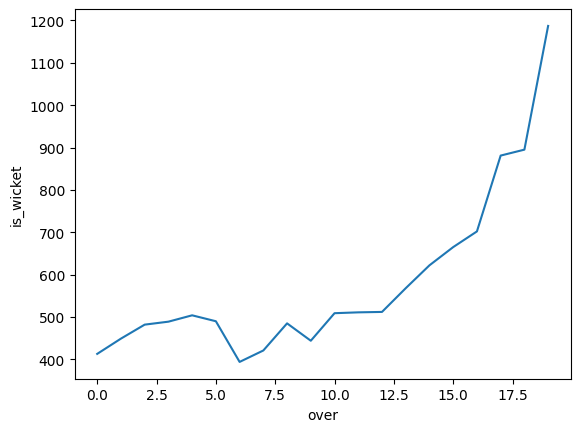

In [ ]:
sns.lineplot(x=data_wicket_over["over"], y=data_wicket_over["is_wicket"])

In [ ]:
data_heatmap = data[['innings', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs','is_wicket']]
data_heatmap.corr()

,innings,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
innings,1.000000,-0.049666,-0.004576,-0.005856,-0.000198,-0.005942,0.000570
over,-0.049666,1.000000,-0.003366,0.083567,0.002262,0.084675,0.074222
ball,-0.004576,-0.003366,1.000000,0.005294,0.000342,0.005407,0.004446
batsman_runs,-0.005856,0.083567,0.005294,1.000000,-0.140648,0.977619,-0.170779
extra_runs,-0.000198,0.002262,0.000342,-0.140648,1.000000,0.070794,-0.041542
total_runs,-0.005942,0.084675,0.005407,0.977619,0.070794,1.000000,-0.180888
is_wicket,0.000570,0.074222,0.004446,-0.170779,-0.041542,-0.180888,1.000000


<Axes: >

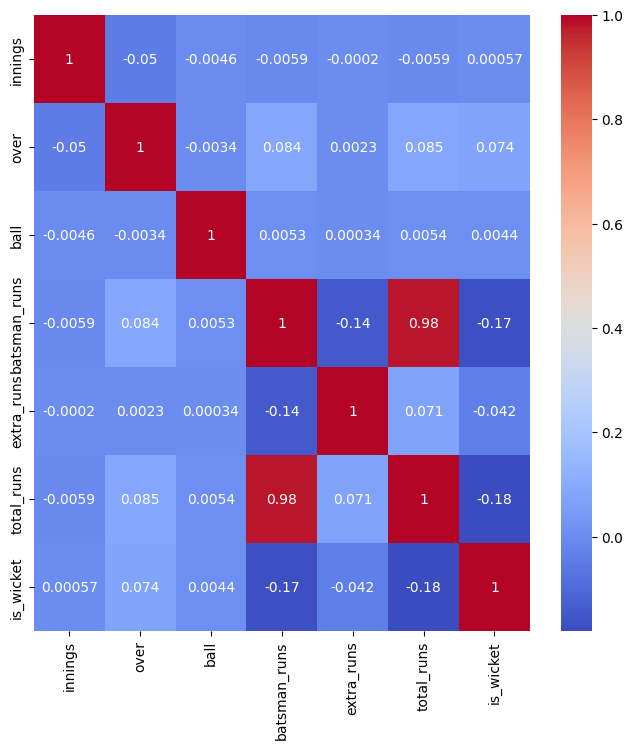

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data_heatmap.corr(),annot=True, cmap='coolwarm')

In [ ]:
LR_Data = data.copy()

# 4. Pytrend

## Current trend of ipl in different countries

In [ ]:
trends.build_payload(kw_list=["ipl"])
data = trends.interest_by_region()
data = data.sort_values(by="ipl", ascending=False)
data = data.head(20)
print(data)

                      ipl
geoName                  
Nepal                 100
India                  99
Qatar                  60
Sri Lanka              56
United Arab Emirates   52
Bangladesh             45
Bahrain                39
Oman                   37
Kuwait                 29
Pakistan               14
Saudi Arabia           13
Singapore               7
South Africa            3
Malaysia                3
United Kingdom          2
Australia               2
Canada                  2
United States           1
Poland                  0
Palau                   0


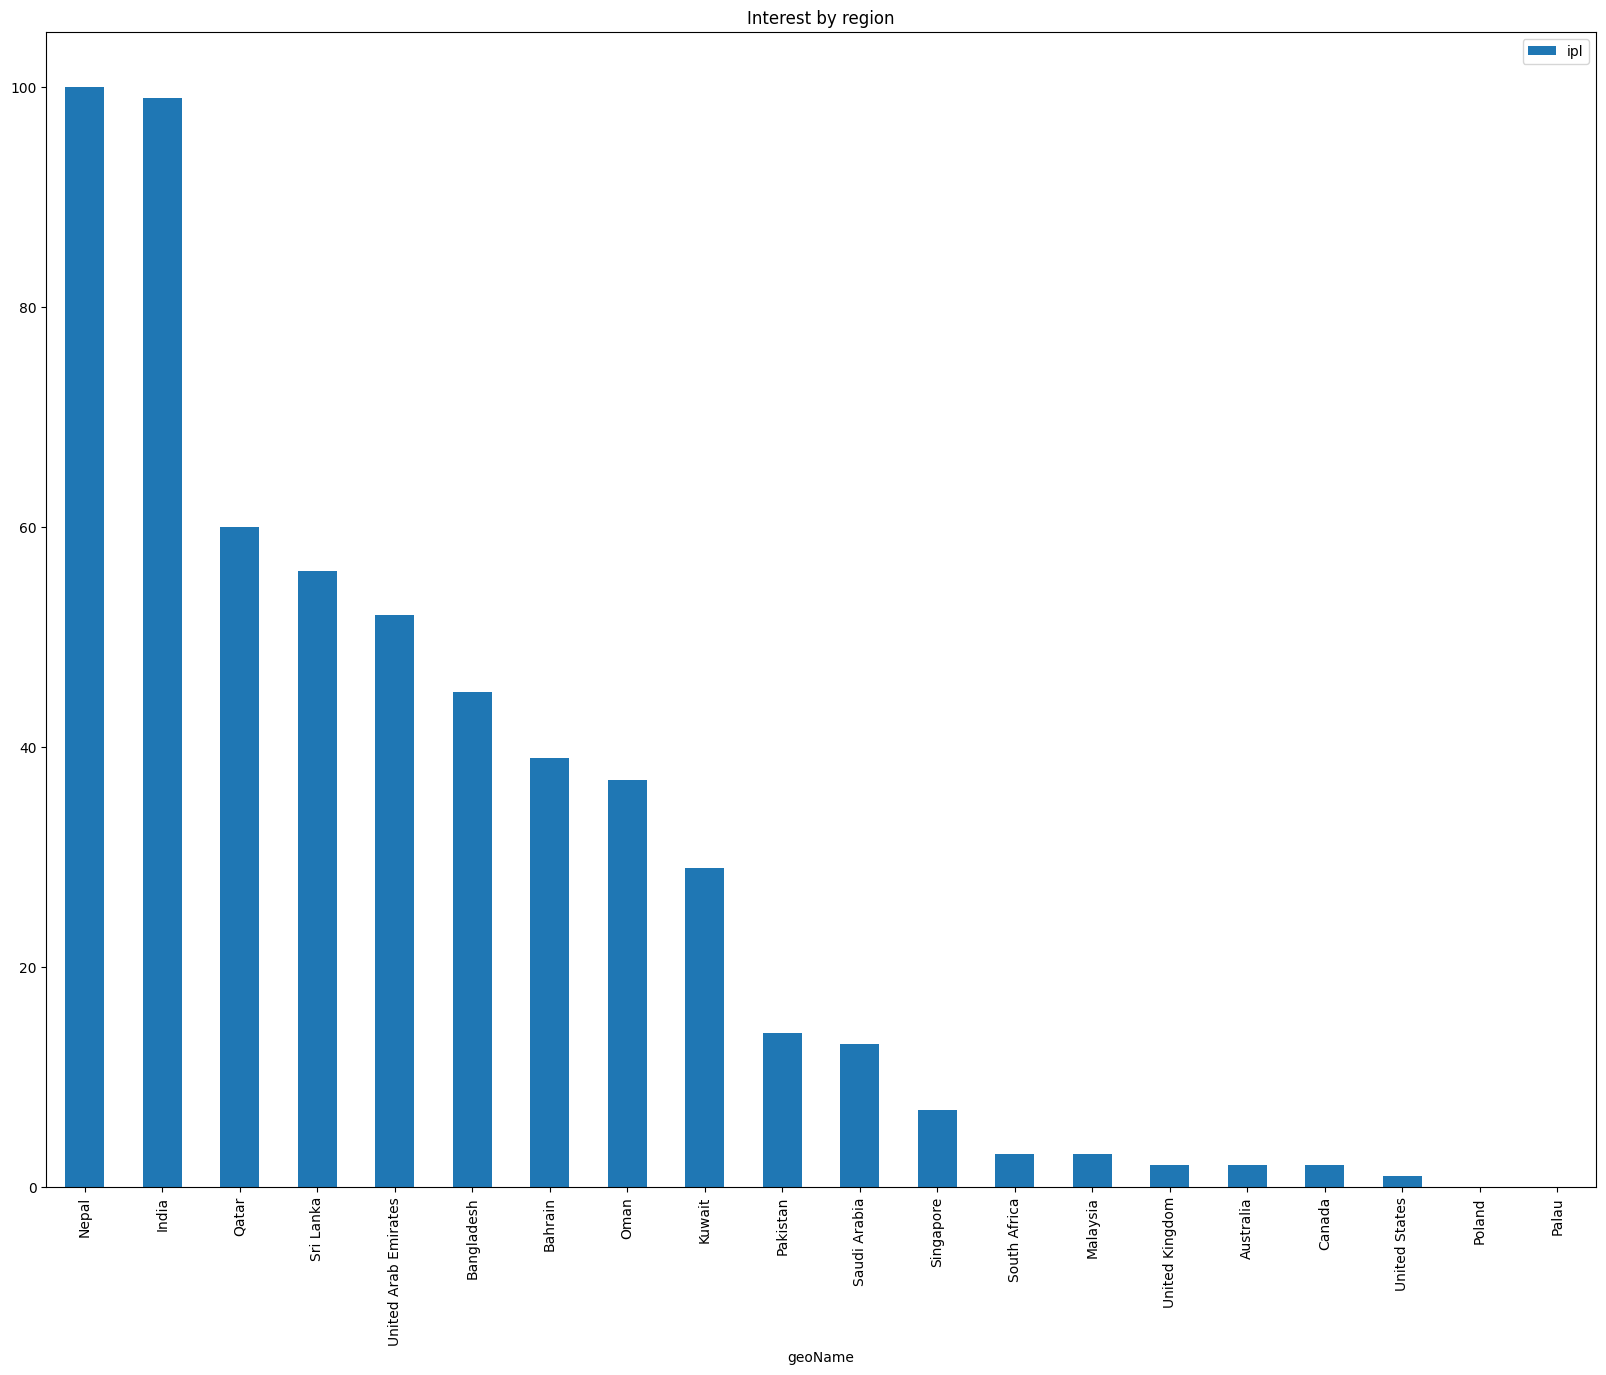

In [ ]:
data.reset_index().plot(x="geoName", y="ipl", figsize=(20,15), kind="bar", title = 'Interest by region')
plt.style.use('classic')
plt.show()

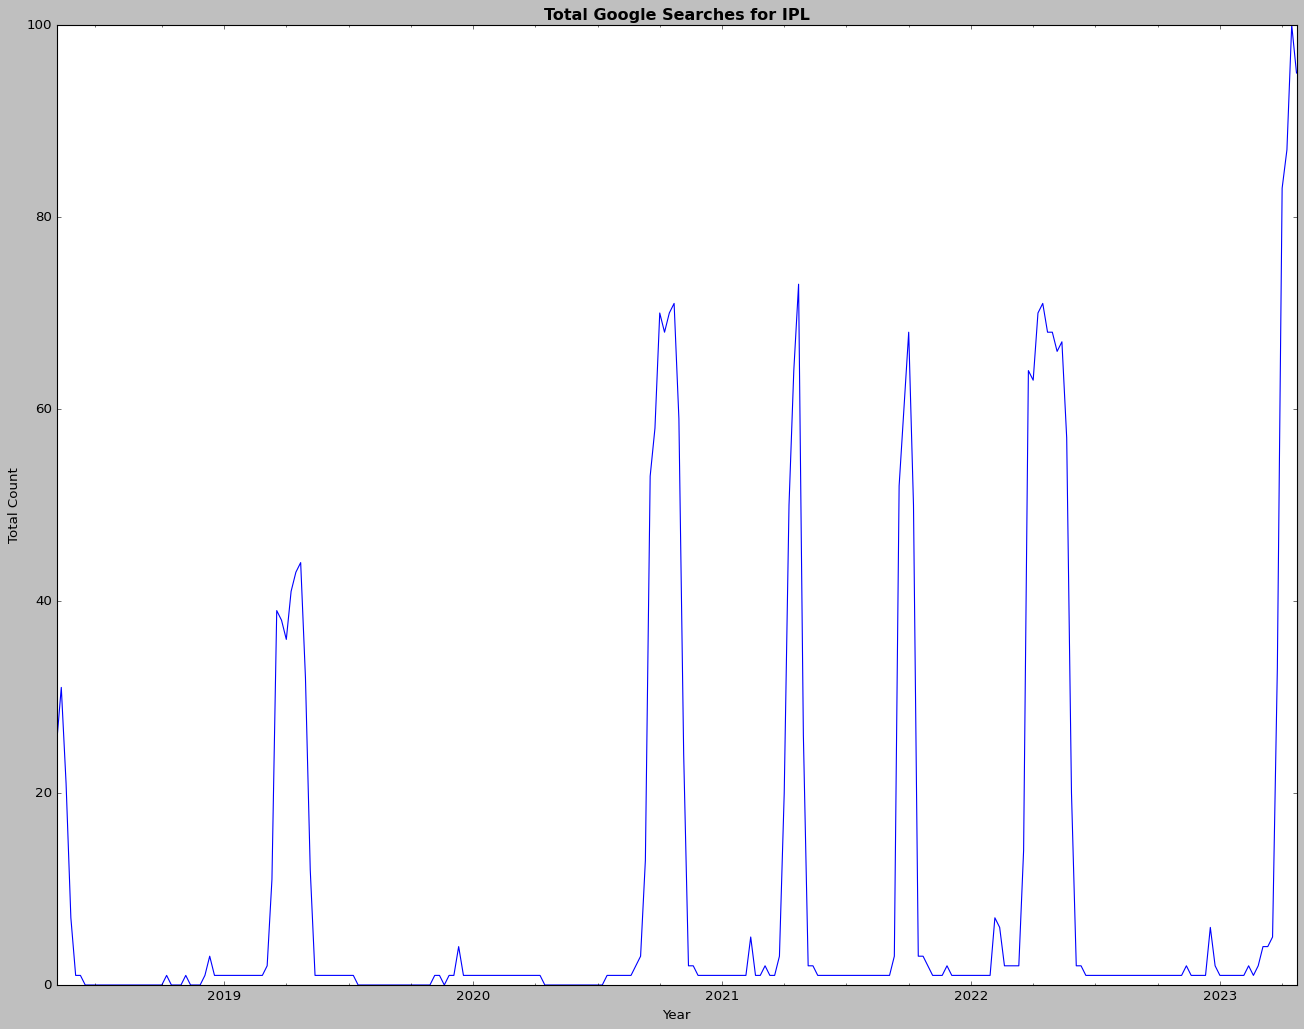

In [ ]:
data = TrendReq(hl="en-US", tz=360)
data.build_payload(kw_list=['ipl'])
data = data.interest_over_time()
fig,ax = plt.subplots(figsize = (20,15))
data['ipl'].plot()
plt.style.use("classic")
plt.title('Total Google Searches for IPL', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

# 5. Applying some interesting machine learning problems (classification, regression, clustering, etc.) 

## Applying K-means clustering to acquire the labels for different type of player ( Batsman, Bowler, All-rounder )

### K-means Clustering for 2-attributes ( scored runs, wickets taken )

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_player = data_player.copy()
data_player = data_player.query('(batting_innings > 10) | (bowling_innings > 10)')

data_player = data_player.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
data_player.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,...,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,bowled_overs,bowling_avg,bowling_strikeRate,Economy Rate
0,V Kohli,223.0,200.0,6967.0,230.0,612.0,5301.0,113.0,5.0,50.0,...,26.0,370.0,4.0,248.0,2.0,0.0,41.333333,92.500000,62.00,8.951613
1,S Dhawan,209.0,182.0,6477.0,145.0,730.0,4998.0,106.0,2.0,49.0,...,6.0,72.0,4.0,45.0,1.0,0.0,7.500000,18.000000,11.25,9.600000
3,RG Sharma,228.0,210.0,6062.0,251.0,539.0,4596.0,109.0,1.0,41.0,...,32.0,461.0,15.0,333.0,4.0,1.0,55.500000,30.733333,22.20,8.306306
4,SK Raina,200.0,168.0,5536.0,204.0,506.0,3967.0,100.0,1.0,39.0,...,69.0,1137.0,25.0,889.0,2.0,0.0,148.166667,45.480000,35.56,7.673791
5,AB de Villiers,170.0,125.0,5181.0,253.0,414.0,3344.0,133.0,3.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000


In [ ]:
data_player.describe()

,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,...,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,bowled_overs,bowling_avg,bowling_strikeRate,Economy Rate
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,37.543284,29.182090,741.408955,29.337313,66.468657,558.591045,49.053731,0.202985,3.770149,116.375864,...,31.647761,833.934328,28.961194,607.232836,2.391045,0.552239,101.205473,25.689289,18.002907,6.432106
std,43.906921,37.654508,1189.569246,50.015713,111.882201,874.305810,35.932531,0.726317,7.865505,33.179997,...,37.156830,1015.480837,38.051828,766.929362,1.679190,1.119821,127.821560,19.583323,13.261124,3.780049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,6.000000,53.000000,1.000000,4.000000,58.000000,18.000000,0.000000,0.000000,100.343643,...,1.500000,10.000000,1.000000,10.500000,1.000000,0.000000,1.750000,5.500000,5.750000,5.668103
50%,20.000000,14.000000,251.000000,9.000000,19.000000,191.000000,41.000000,0.000000,0.000000,122.807018,...,19.000000,458.000000,14.000000,315.000000,3.000000,0.000000,52.500000,27.937500,19.842975,8.033413
75%,46.500000,34.000000,875.500000,35.000000,73.500000,647.000000,75.000000,0.000000,4.000000,136.733864,...,44.000000,1166.500000,40.000000,857.000000,4.000000,1.000000,142.833333,34.643182,24.651261,8.950511
max,228.000000,210.000000,6967.000000,359.000000,730.000000,5301.000000,175.000000,6.000000,50.000000,200.000000,...,188.000000,4789.000000,183.000000,4016.000000,6.000000,8.000000,669.333333,130.000000,84.000000,12.555556


Text(0, 0.5, 'Wickets')

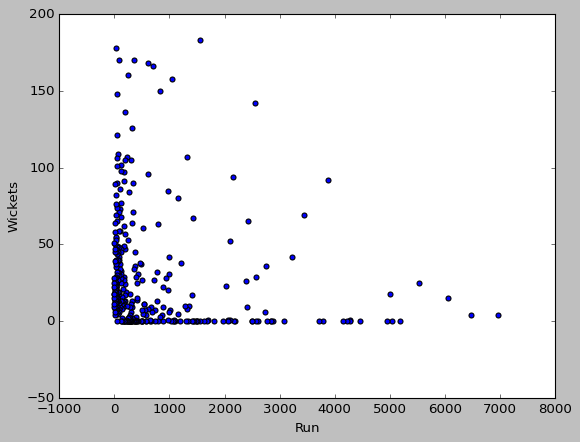

In [ ]:
plt.scatter(data_player['scored_runs'],data_player['wickets_taken'])
plt.xlabel('Run')
plt.ylabel('Wickets')

In [ ]:
data_player_km2 = data_player.loc[:,['scored_runs', 'wickets_taken']]

scaler = MinMaxScaler()

scaler.fit(data_player_km2[['scored_runs']])
data_player_km2['scored_runs'] = scaler.transform(data_player_km2[['scored_runs']])

scaler.fit(data_player_km2[['wickets_taken']])
data_player_km2['wickets_taken'] = scaler.transform(data_player_km2[['wickets_taken']])

In [ ]:
data_player_km2.head()

,scored_runs,wickets_taken
0,1.000000,0.021858
1,0.929668,0.021858
3,0.870102,0.081967
4,0.794603,0.136612
5,0.743649,0.000000


Text(0, 0.5, 'Wickets')

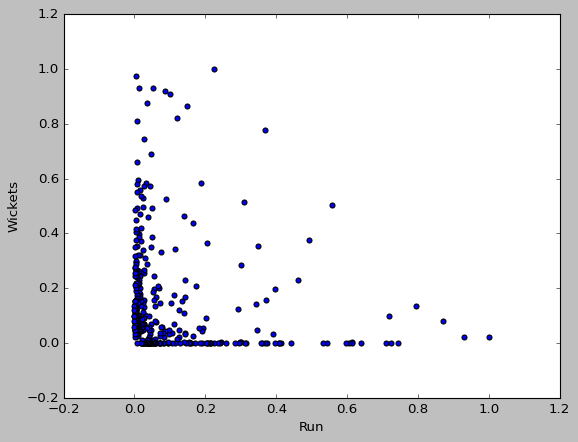

In [ ]:
plt.scatter(data_player_km2['scored_runs'],data_player_km2['wickets_taken'])
plt.xlabel('Run')
plt.ylabel('Wickets')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data_player_km2[['scored_runs','wickets_taken']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
data_player['player_type']=y_predicted
data_player.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,...,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,bowled_overs,bowling_avg,bowling_strikeRate,Economy Rate,player_type
0,V Kohli,223.0,200.0,6967.0,230.0,612.0,5301.0,113.0,5.0,50.0,...,370.0,4.0,248.0,2.0,0.0,41.333333,92.500000,62.00,8.951613,0
1,S Dhawan,209.0,182.0,6477.0,145.0,730.0,4998.0,106.0,2.0,49.0,...,72.0,4.0,45.0,1.0,0.0,7.500000,18.000000,11.25,9.600000,0
3,RG Sharma,228.0,210.0,6062.0,251.0,539.0,4596.0,109.0,1.0,41.0,...,461.0,15.0,333.0,4.0,1.0,55.500000,30.733333,22.20,8.306306,0
4,SK Raina,200.0,168.0,5536.0,204.0,506.0,3967.0,100.0,1.0,39.0,...,1137.0,25.0,889.0,2.0,0.0,148.166667,45.480000,35.56,7.673791,0
5,AB de Villiers,170.0,125.0,5181.0,253.0,414.0,3344.0,133.0,3.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,0


In [ ]:
km.cluster_centers_

array([[0.4942464 , 0.06903905],
       [0.05067688, 0.0877915 ],
       [0.06021947, 0.56573449]])

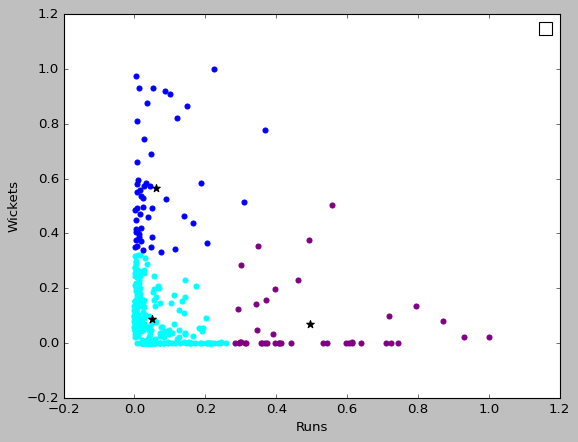

In [ ]:
data_player1 = data_player_km2[data_player.player_type==0]
data_player2 = data_player_km2[data_player.player_type==1]
data_player3 = data_player_km2[data_player.player_type==2]
plt.scatter(data_player1.scored_runs,data_player1.wickets_taken,color='purple')
plt.scatter(data_player2.scored_runs,data_player2.wickets_taken,color='cyan')
plt.scatter(data_player3.scored_runs,data_player3.wickets_taken,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black', marker="*",s = 50)
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,6)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(data_player_km2[['scored_runs','wickets_taken']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

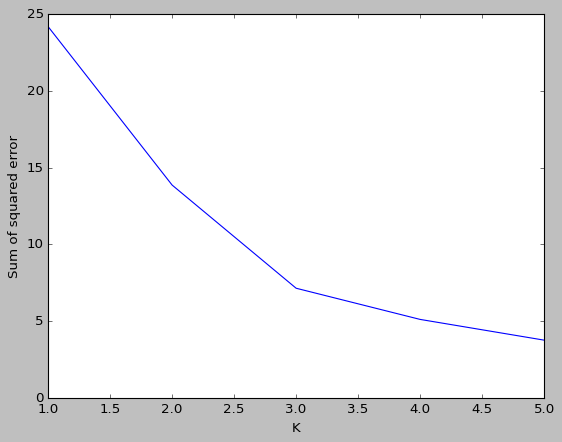

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### K-means Clustering for 8-attributes

In [ ]:
data_player_km8 = data_player.loc[:,['scored_runs', 'wickets_taken', 'batting_innings', 'bowling_innings', 'high_score', 'best_spell', 'batting_avg', 'bowling_avg']]

scaler.fit(data_player_km8[['scored_runs']])
data_player_km8['scored_runs'] = scaler.transform(data_player_km8[['scored_runs']])

scaler.fit(data_player_km8[['wickets_taken']])
data_player_km8['wickets_taken'] = scaler.transform(data_player_km8[['wickets_taken']])

scaler.fit(data_player_km8[['batting_innings']])
data_player_km8['batting_innings'] = scaler.transform(data_player_km8[['batting_innings']])

scaler.fit(data_player_km8[['bowling_innings']])
data_player_km8['bowling_innings'] = scaler.transform(data_player_km8[['bowling_innings']])

scaler.fit(data_player_km8[['high_score']])
data_player_km8['high_score'] = scaler.transform(data_player_km8[['high_score']])

scaler.fit(data_player_km8[['best_spell']])
data_player_km8['best_spell'] = scaler.transform(data_player_km8[['best_spell']])

scaler.fit(data_player_km8[['batting_avg']])
data_player_km8['batting_avg'] = scaler.transform(data_player_km8[['batting_avg']])

scaler.fit(data_player_km8[['bowling_avg']])
data_player_km8['bowling_avg'] = scaler.transform(data_player_km8[['bowling_avg']])

In [ ]:
data_player_km8.head()

,scored_runs,wickets_taken,batting_innings,bowling_innings,high_score,best_spell,batting_avg,bowling_avg
0,1.000000,0.021858,0.978070,0.138298,0.645714,0.333333,0.395852,0.711538
1,0.929668,0.021858,0.916667,0.031915,0.605714,0.166667,0.404408,0.138462
3,0.870102,0.081967,1.000000,0.170213,0.622857,0.666667,0.328030,0.236410
4,0.794603,0.136612,0.877193,0.367021,0.571429,0.333333,0.374459,0.349846
5,0.743649,0.000000,0.745614,0.000000,0.760000,0.000000,0.471000,0.000000


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data_player_km8)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1,
       0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
data_player['player_type']=y_predicted
data_player.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,...,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,bowled_overs,bowling_avg,bowling_strikeRate,Economy Rate,player_type
0,V Kohli,223.0,200.0,6967.0,230.0,612.0,5301.0,113.0,5.0,50.0,...,370.0,4.0,248.0,2.0,0.0,41.333333,92.500000,62.00,8.951613,1
1,S Dhawan,209.0,182.0,6477.0,145.0,730.0,4998.0,106.0,2.0,49.0,...,72.0,4.0,45.0,1.0,0.0,7.500000,18.000000,11.25,9.600000,1
3,RG Sharma,228.0,210.0,6062.0,251.0,539.0,4596.0,109.0,1.0,41.0,...,461.0,15.0,333.0,4.0,1.0,55.500000,30.733333,22.20,8.306306,1
4,SK Raina,200.0,168.0,5536.0,204.0,506.0,3967.0,100.0,1.0,39.0,...,1137.0,25.0,889.0,2.0,0.0,148.166667,45.480000,35.56,7.673791,1
5,AB de Villiers,170.0,125.0,5181.0,253.0,414.0,3344.0,133.0,3.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,1


In [ ]:
SSE = []
k_range = range(1,6)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(data_player_km8)
  SSE.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

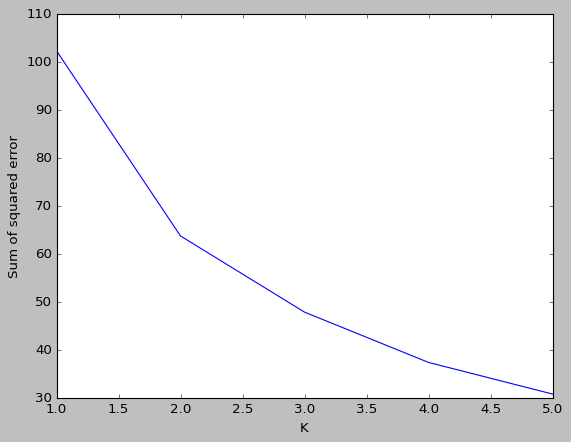

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,SSE)

### KNN-Classification

In [ ]:
# Extracting Dependent Variable and Independent

data_player_class = data_player.copy()
data_player_class = data_player_class.sample(frac=1).reset_index()

x = data_player_class.loc[:, ['scored_runs', 'wickets_taken', 'batting_innings', 'bowling_innings', 'high_score', 'best_spell', 'batting_avg', 'bowling_avg']]
y = data_player_class.loc[:, 'player_type']

In [ ]:
# Training set and test set data split

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=0)  
  
# feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)

In [ ]:
# K-NN classifier fitting to the training set  

from sklearn.neighbors import KNeighborsClassifier 
 
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [ ]:
# Predicting the test set result  
y_pred = classifier.predict(x_test)
y_pred

array([1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1], dtype=int32)

In [ ]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 23,  3],
       [ 0,  1, 31]])

Class	Accuracy	Precision	Recall	F1-score

0	0.9718	1.0000	0.8889	0.9412

1	0.9718	0.9737	0.9737	0.9737

2	0.9718	0.9167	1.0000	0.9565

### Applying Linear Regression and predicting score for IPL 2023 for a player.

In [ ]:
def Linear_Regression(data,name):
  temp1 = data[data['batsman'] == name]
  temp1 = temp1.iloc[:-1]
  plt.plot(temp1['year'],temp1['batsman_runs'],label='Original')
  plt.title( f'Run scored by {name}')
  from sklearn.linear_model import LinearRegression
  model1 = LinearRegression()
  model1.fit(np.array(temp1['year']).reshape(-1,1),np.array(temp1['batsman_runs']).reshape(-1,1))
  coeff = model1.coef_
  inter = model1.intercept_
  xlin = np.linspace(temp1['year'].min(),temp1['year'].max(),200)
  ylin = coeff[0]*xlin + inter
  plt.plot(xlin,ylin,linestyle='-.',label=f'Predicted: {coeff}*x + {inter}')
  plt.legend()
  plt.show()
  ypred = model1.predict(np.array(2023).reshape(-1,1))
  return ypred

In [ ]:
da1 = LR_Data.groupby(['batsman','year'])['batsman_runs'].sum().reset_index()
name = 'V Kohli'

In [ ]:
LR_Data

,id,season,start_date,venue,innings,over,ball,batting_team,bowling_team,batsman,...,byes,legbyes,penalty,dismissal_kind,is_wicket,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,...,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,1,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0,5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234754,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,3,Royal Challengers Bangalore,Kolkata Knight Riders,Vijaykumar Vyshak,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,2023
234755,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,4,Royal Challengers Bangalore,Kolkata Knight Riders,DJ Willey,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,4,2023
234756,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,5,Royal Challengers Bangalore,Kolkata Knight Riders,DJ Willey,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2,2023
234757,1359510,2023,2023-04-26,"M Chinnaswamy Stadium, Bengaluru",2,19,6,Royal Challengers Bangalore,Kolkata Knight Riders,DJ Willey,...,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,1,2023


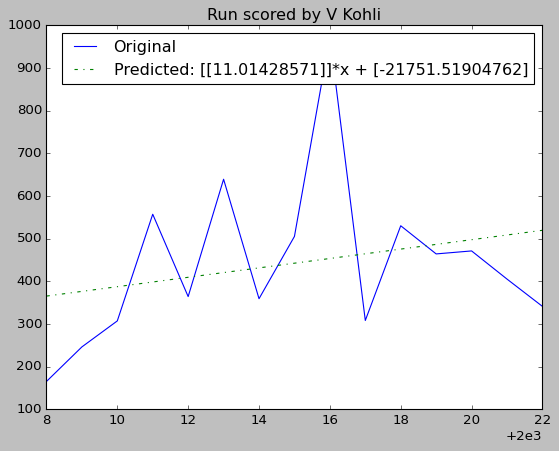

array([[530.38095238]])

In [ ]:
Linear_Regression(da1,name)

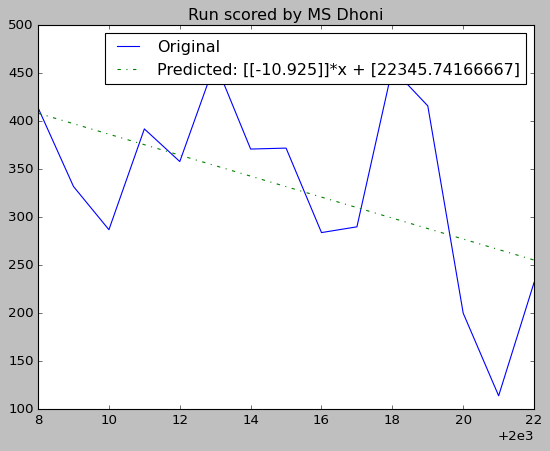

array([[244.46666667]])

In [ ]:
Linear_Regression(da1,'MS Dhoni')

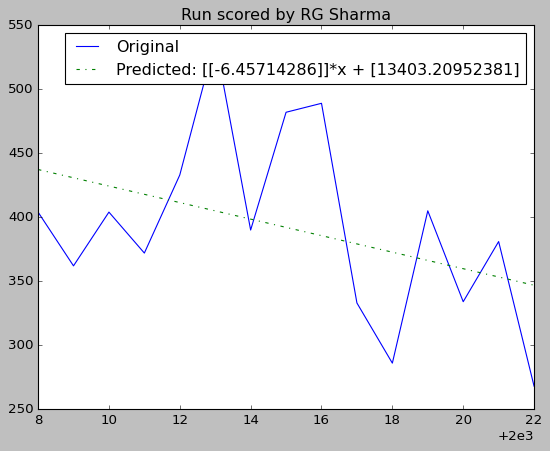

array([[340.40952381]])

In [ ]:
Linear_Regression(da1,'RG Sharma')